In [422]:
import pandas as pd
import matplotlib.pyplot as plt

In [423]:
#The following code will run the groupby and plot a nice time series graph.

import matplotlib.dates as mdates

def plot_gb_time_series(df, ts_name, gb_name, value_name, figsize=(20,7), title=None, filefig = None):
    '''
    Runs groupby on Pandas dataframe and produces a time series chart.

    Parameters:
    ----------
    df : Pandas dataframe
    ts_name : string
        The name of the df column that has the datetime timestamp x-axis values.
    gb_name : string
        The name of the df column to perform group-by.
    value_name : string
        The name of the df column for the y-axis.
    figsize : tuple of two integers
        Figure size of the resulting plot, e.g. (20, 7)
    title : string
        Optional title
    '''
    xtick_locator = mdates.DayLocator(interval=1)
    xtick_dateformatter = mdates.DateFormatter('/%Y-%m')
    fig, ax = plt.subplots(figsize=figsize)
    for key, grp in df.groupby([gb_name]):
        ax = grp.plot(ax=ax, kind='line', x=ts_name, y=value_name, label=key, marker='o')
    ax.xaxis.set_major_locator(xtick_locator)
    ax.xaxis.set_major_formatter(xtick_dateformatter)
    ax.autoscale_view()
    ax.legend(loc='upper right')
    _ = plt.xticks(rotation=90, )
    _ = plt.grid(True)
    _ = plt.xlabel(ts_name)
    _ = plt.ylim(0, df[value_name].max() * 1.25)
    _ = plt.ylabel(value_name)
    if title is not None:
        _ = plt.title(title)
    if filefig is not None:
        _ = plt.savefig(filefig)  
    _ = plt.show()
    

In [424]:
#importa dataset Dubai real estate
Filename = 'Real Estate Transactions.csv'
df = pd.read_csv( Filename)
df.head()

C:\Users\SAMSUNG\anaconda3\envs\ML\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,procedure_id,procedure_name_en,instance_date,property_type_id,property_type_en,area_name_en,property_sub_type_en,procedure_area,actual_worth,meter_sale_price,rent_value,meter_rent_price,building_name_en,reg_type_id,reg_type_en
0,1,Sales,04/07/1998,1,Land,Al Barsha,Commercial,1393.55,690000.0,495.14,NaN,NaN,NaN,1,Existing Properties
1,1,Sales,05/03/2000,1,Land,Al Barsha,Commercial,1393.55,450000.0,322.92,NaN,NaN,NaN,1,Existing Properties
2,1,Sales,18/06/1998,1,Land,Al Barsha,Commercial,1393.55,620000.0,444.91,NaN,NaN,NaN,1,Existing Properties
3,1,Sales,28/10/2001,1,Land,Al Barsha,Commercial,1393.55,375000.0,269.10,NaN,NaN,NaN,1,Existing Properties
4,1,Sales,09/02/2000,1,Land,Al Barsha,Commercial,1393.55,100000.0,71.76,NaN,NaN,NaN,1,Existing Properties


In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806599 entries, 0 to 806598
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   procedure_id          806599 non-null  int64  
 1   procedure_name_en     806599 non-null  object 
 2   instance_date         806594 non-null  object 
 3   property_type_id      806599 non-null  int64  
 4   property_type_en      806599 non-null  object 
 5   area_name_en          803323 non-null  object 
 6   property_sub_type_en  806599 non-null  object 
 7   procedure_area        806599 non-null  float64
 8   actual_worth          806599 non-null  float64
 9   meter_sale_price      806599 non-null  float64
 10  rent_value            33023 non-null   float64
 11  meter_rent_price      33023 non-null   float64
 12  building_name_en      563330 non-null  object 
 13  reg_type_id           806599 non-null  int64  
 14  reg_type_en           806599 non-null  object 
dtype

In [426]:
#Convert string into date for the group by

df['year_month'] = df['instance_date'].str.slice(6, 10) +"-"+ df['instance_date'].str.slice(3, 5)
df['year'] = df['instance_date'].str.slice(6, 10)

df['instance_date'] = pd.to_datetime(df['instance_date'], format='%d/%m/%Y') #convert string to datetime
df = df.set_index('instance_date') # set data as index

print (df.dtypes)
df.describe()
df.head()

procedure_id              int64
procedure_name_en        object
property_type_id          int64
property_type_en         object
area_name_en             object
property_sub_type_en     object
procedure_area          float64
actual_worth            float64
meter_sale_price        float64
rent_value              float64
meter_rent_price        float64
building_name_en         object
reg_type_id               int64
reg_type_en              object
year_month               object
year                     object
dtype: object


,procedure_id,procedure_name_en,property_type_id,property_type_en,area_name_en,property_sub_type_en,procedure_area,actual_worth,meter_sale_price,rent_value,meter_rent_price,building_name_en,reg_type_id,reg_type_en,year_month,year
instance_date,,,,,,,,,,,,,,,,
1998-07-04,1,Sales,1,Land,Al Barsha,Commercial,1393.55,690000.0,495.14,NaN,NaN,NaN,1,Existing Properties,1998-07,1998
2000-03-05,1,Sales,1,Land,Al Barsha,Commercial,1393.55,450000.0,322.92,NaN,NaN,NaN,1,Existing Properties,2000-03,2000
1998-06-18,1,Sales,1,Land,Al Barsha,Commercial,1393.55,620000.0,444.91,NaN,NaN,NaN,1,Existing Properties,1998-06,1998
2001-10-28,1,Sales,1,Land,Al Barsha,Commercial,1393.55,375000.0,269.10,NaN,NaN,NaN,1,Existing Properties,2001-10,2001
2000-02-09,1,Sales,1,Land,Al Barsha,Commercial,1393.55,100000.0,71.76,NaN,NaN,NaN,1,Existing Properties,2000-02,2000


In [427]:
df["year"].value_counts()

2009    107187
2013     77120
2014     70177
2017     67297
2015     63637
2010     59016
2016     58187
2019     56650
2018     52479
2012     48027
2011     42272
2008     32399
2020     24512
2007     15090
2006      5119
2004      4658
2005      4528
2002      3717
2003      3659
2001      3446
1999      3137
2000      2775
1998      1444
1997        57
1995         3
1996         1
Name: year, dtype: int64

In [448]:
#voglio fare una group by area per analizzare andamento delle aree in dubai negli ultimi anni
#dfgb=df.groupby([(df.index.year),(df.index.month)]).count()

dfgb = df.groupby(["year","area_name_en","building_name_en" ]).agg(['mean', 'count', 'sum'])

dfgb = dfgb.reset_index()

dfgb.head()
dfgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19058 entries, 0 to 19057
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (year, )                   19058 non-null  object 
 1   (area_name_en, )           19058 non-null  object 
 2   (building_name_en, )       19058 non-null  object 
 3   (procedure_id, mean)       19058 non-null  float64
 4   (procedure_id, count)      19058 non-null  int64  
 5   (procedure_id, sum)        19058 non-null  int64  
 6   (property_type_id, mean)   19058 non-null  int64  
 7   (property_type_id, count)  19058 non-null  int64  
 8   (property_type_id, sum)    19058 non-null  int64  
 9   (procedure_area, mean)     19058 non-null  float64
 10  (procedure_area, count)    19058 non-null  int64  
 11  (procedure_area, sum)      19058 non-null  float64
 12  (actual_worth, mean)       19058 non-null  float64
 13  (actual_worth, count)      19058 non-null  int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19058 entries, 0 to 19057
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (year, )                   19058 non-null  object 
 1   (area_name_en, )           19058 non-null  object 
 2   (building_name_en, )       19058 non-null  object 
 3   (procedure_id, mean)       19058 non-null  float64
 4   (procedure_id, count)      19058 non-null  int64  
 5   (procedure_id, sum)        19058 non-null  int64  
 6   (property_type_id, mean)   19058 non-null  int64  
 7   (property_type_id, count)  19058 non-null  int64  
 8   (property_type_id, sum)    19058 non-null  int64  
 9   (procedure_area, mean)     19058 non-null  float64
 10  (procedure_area, count)    19058 non-null  int64  
 11  (procedure_area, sum)      19058 non-null  float64
 12  (actual_worth, mean)       19058 non-null  float64
 13  (actual_worth, count)      19058 non-null  int

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19058 entries, 0 to 19057
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   (year, )               19058 non-null  object
 1   (area_name_en, )       19058 non-null  object
 2   (procedure_id, count)  19058 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 446.8+ KB


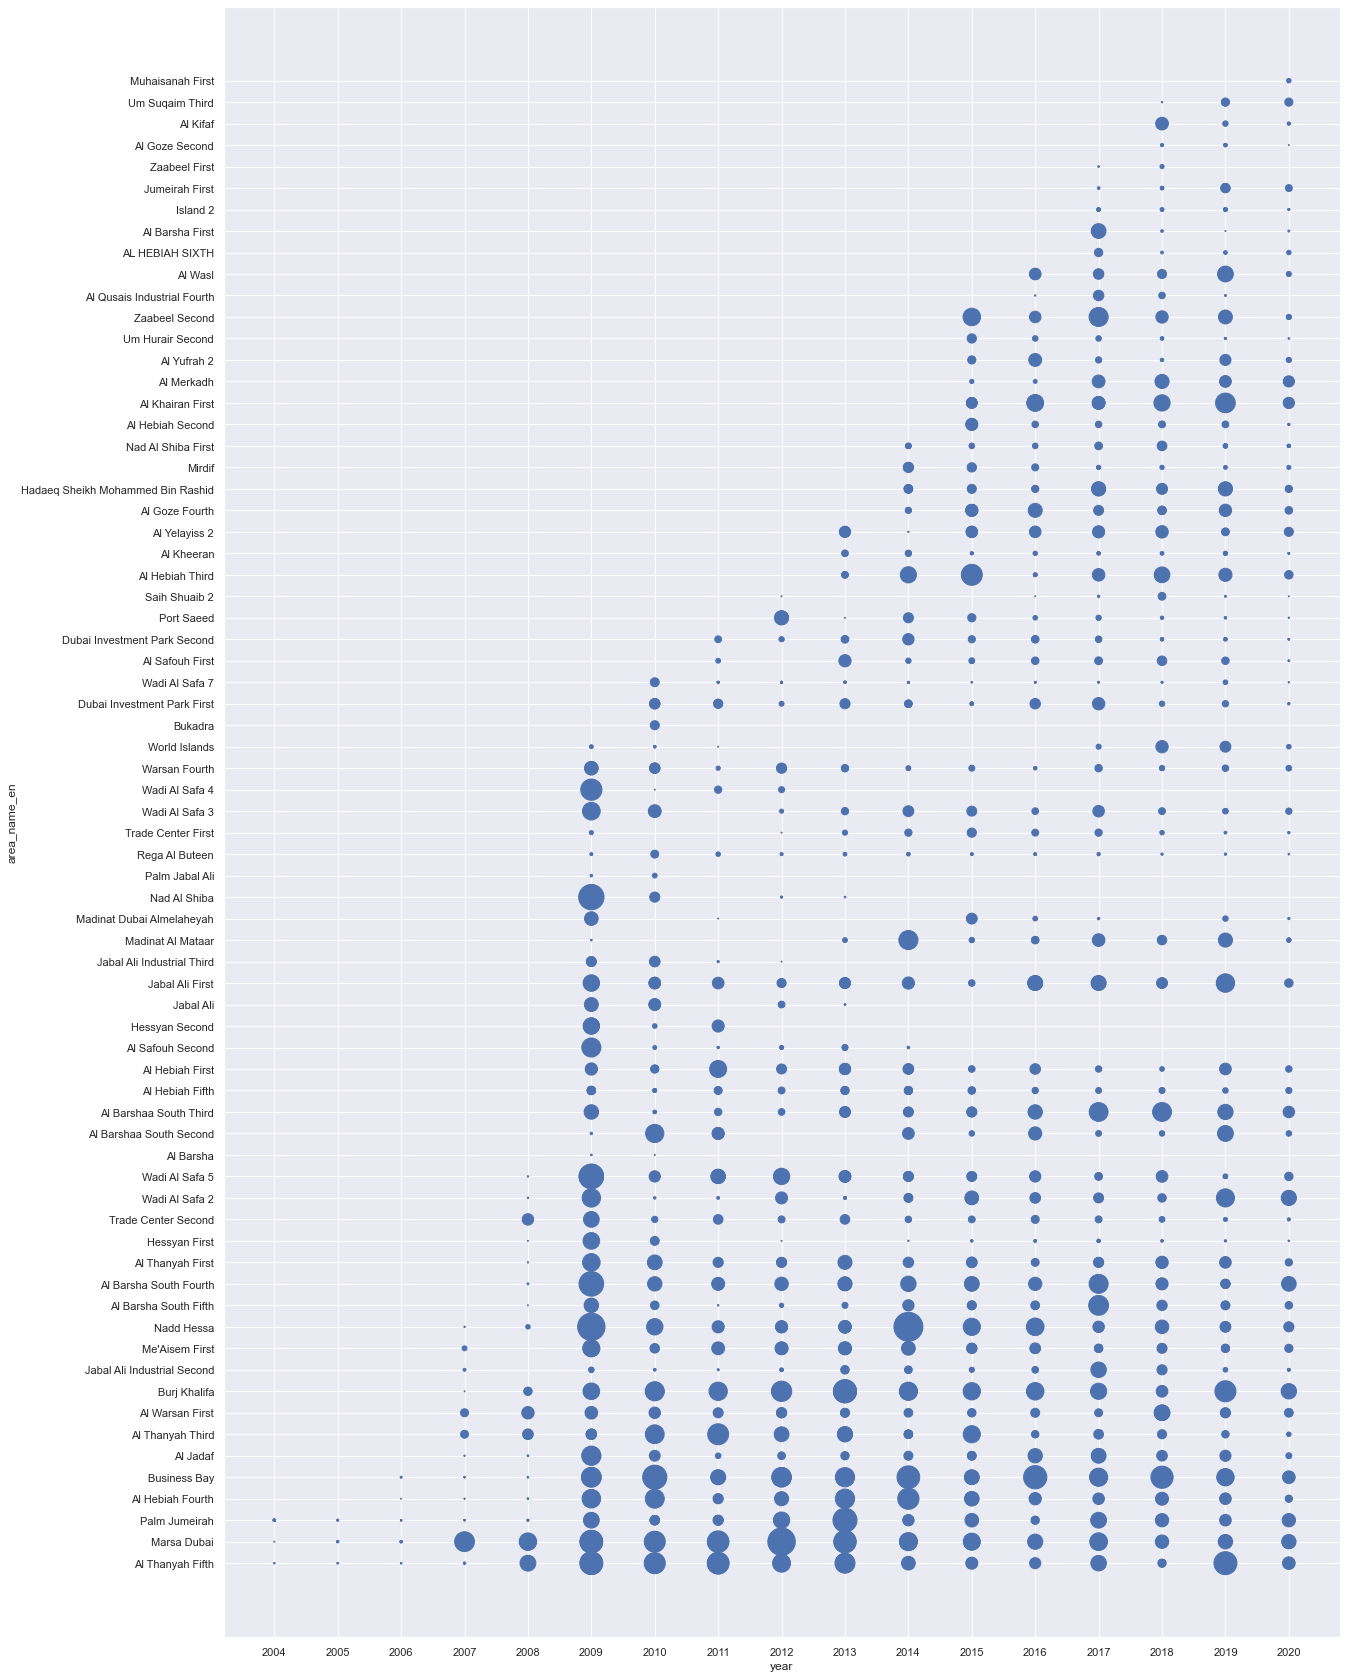

In [430]:

houses = dfgb[[('year',''),('area_name_en',''),('procedure_id', 'count')]]
houses.plot.scatter(x='year', y='area_name_en', s=dfgb[('procedure_id', 'count')], figsize=(20,30))

houses.info()

C:\Users\SAMSUNG\anaconda3\envs\ML\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


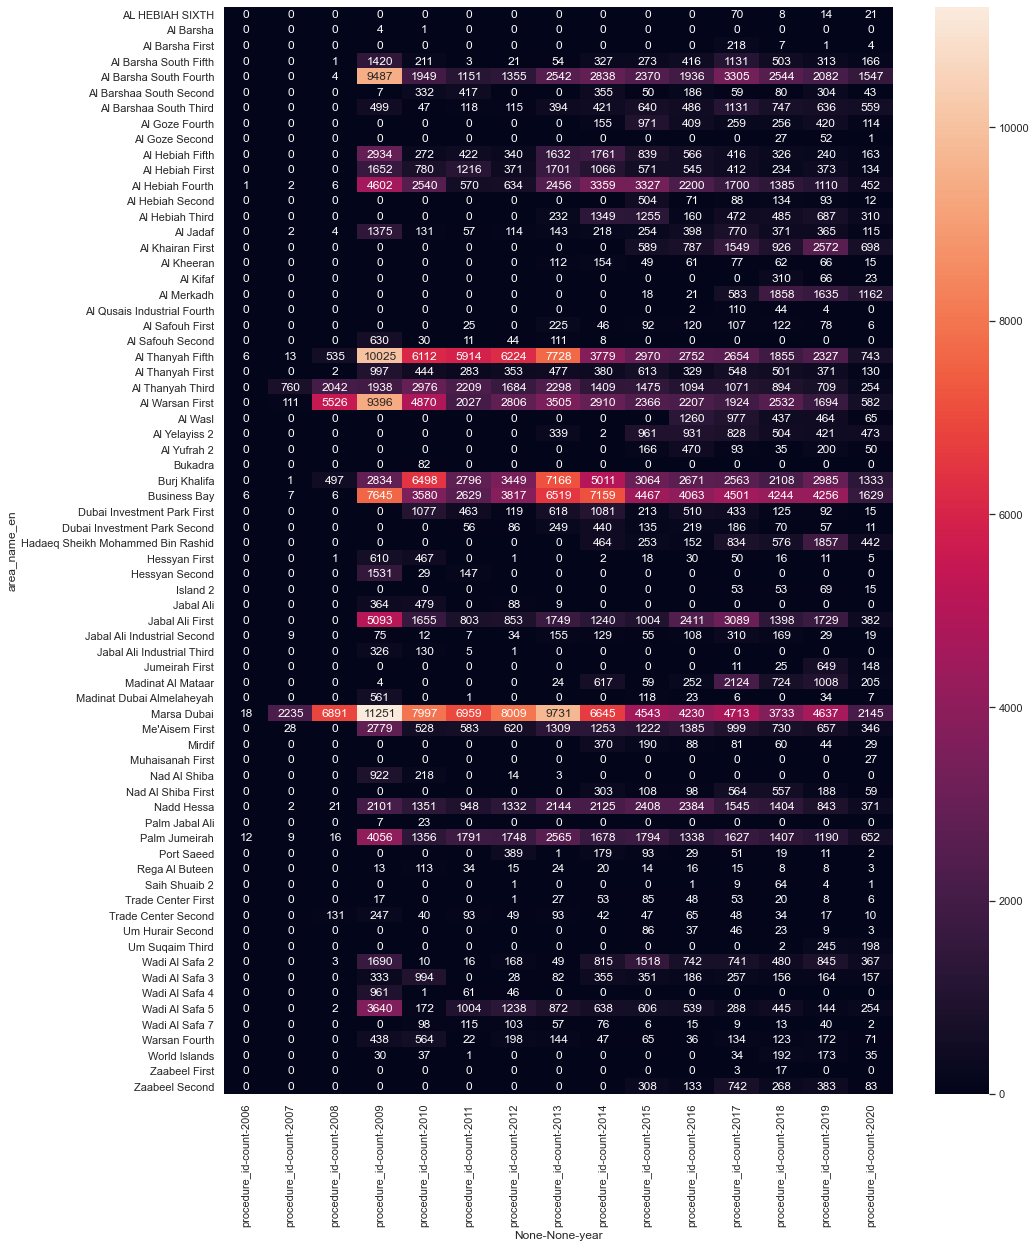

In [431]:
import seaborn as sns; 
sns.set()
heatmap1_data = pd.pivot_table(houses.loc[(houses['year']>'2005')], values=[('procedure_id', 'count')], 
                     index='area_name_en', 
                     columns='year',
                     fill_value=0,     #fill NaN value with zero
                     aggfunc='sum')    #default aggregation function in pivot is mean that return float so use sum
plt.figure(figsize=(15, 20))
sns.heatmap(heatmap1_data, annot=True, fmt="d" )
#heatmap1_data.info()
#heatmap1_data.head()



In [432]:
df.columns

Index(['procedure_id', 'procedure_name_en', 'property_type_id',
       'property_type_en', 'area_name_en', 'property_sub_type_en',
       'procedure_area', 'actual_worth', 'meter_sale_price', 'rent_value',
       'meter_rent_price', 'building_name_en', 'reg_type_id', 'reg_type_en',
       'year_month', 'year'],
      dtype='object')

In [449]:
#select marina from 2010 onwards

#df.loc[(df['Date'] >= StartDt) & (df['Date'] <= EndDt)]

StartDt = '2019-08'
EndDt = '2020-12-31'

dffilter = df.loc[(df['year_month']>StartDt) 
                  & (df['area_name_en'] == 'Marsa Dubai') 
                  & (df['procedure_name_en'] != 'Gifts') 
                  & (df['property_type_en'] == 'Unit') 
                  & (df['property_sub_type_en'] == 'Residential')
                  & (df['meter_sale_price'] <80000) #remove outlier on meter_sale_price
                  & (df['procedure_area'] <100000)
                 ]


In [450]:
dffilter["building_name_en"].value_counts()

La Vie                                             206
Marina Vista Tower 1                               146
Al Fattan Marine Towers                            121
Grand Bleu Tower interiors by Elie Saab Tower 1    110
THE RESIDENCE AT MARINA GATE 2                      88
                                                  ... 
K G TOWER                                            1
BELVEDERE                                            1
THE ZEN TOWER                                        1
MARINA MANSIONS                                      1
Dubai Marina Quays Villas3                           1
Name: building_name_en, Length: 168, dtype: int64

In [435]:
#filtro i buildings che anno transato meno di 50 unita' nel periodo

col = 'building_name_en'   # name of the column that you consider
n = 20                # how many occurrences expected to be appeared

dffilter = dffilter[dffilter.groupby(col)[col].transform('count').ge(n)]

In [436]:
dffilter["building_name_en"].value_counts()

Ciel                                               232
La Vie                                             206
Marina Vista Tower 1                               146
Al Fattan Marine Towers                            121
Grand Bleu Tower interiors by Elie Saab Tower 1    110
THE RESIDENCE AT MARINA GATE 2                      88
Studio One                                          85
Marina Vista Tower 2                                71
DAMAC HEIGHTS                                       69
TFG ONE HOTEL                                       69
Bluewaters Residences 9                             62
BEACH VISTA Tower 1                                 60
BEACH VISTA Tower 2                                 60
Torch Tower                                         55
Jumeirah Living Marina Gate                         54
Bluewaters Residences 5                             50
THE ONE JBR                                         46
Bluewaters Residences 2                             44
TFG MARINA

In [437]:
#voglio fare una group by building per analizzare andamento mensile dei bulding piu' hot negli ultimi anni
#dfgb=df.groupby([(df.index.year),(df.index.month)]).count()

dfgb = dffilter.groupby(["year_month","building_name_en" ]).agg(['mean', 'count', 'sum'])
dfgb = dfgb.reset_index()
dfgb.head()


year_month     building_name_en procedure_id           property_type_id  \
                                          mean count sum             mean   
0    2019-09        52|42 Tower 1          1.0     3   3                3   
1    2019-09        BAY CENTRAL 1          1.0     2   2                3   
2    2019-09        BAY CENTRAL 2          1.0     1   1                3   
3    2019-09  BEACH VISTA Tower 1          1.0    35  35                3   
4    2019-09  BEACH VISTA Tower 2          1.0    19  19                3   

             procedure_area        ... meter_sale_price rent_value             \
  count  sum           mean count  ...              sum       mean count  sum   
0     3    9     106.363333     3  ...         61473.08        NaN     0  0.0   
1     2    6     100.840000     2  ...         28042.19        NaN     0  0.0   
2     1    3      64.370000     1  ...         18642.22        NaN     0  0.0   
3    35  105     171.927143    35  ...        549656.12        NaN     0  0.0   
4    19   57     196.860526    19  ...        224062.05        NaN     0  0.0   

  meter_rent_price            reg_type_id            
              mean count  sum        mean count sum  
0              NaN     0  0.0         0.0     3   0  
1              NaN     0  0.0         1.0     2   2  
2              NaN     0  0.0         1.0     1   1  
3              NaN     0  0.0         0.0    35   0  
4              NaN     0  0.0         0.0    19   0  

[5 rows x 26 columns]

In [438]:
dfgb.describe()

procedure_id                         property_type_id              \
              mean       count         sum             mean       count   
count   418.000000  418.000000  418.000000            418.0  418.000000   
mean      1.168515    5.923445    6.598086              3.0    5.923445   
std       0.281691    8.569584    8.842409              0.0    8.569584   
min       1.000000    1.000000    1.000000              3.0    1.000000   
25%       1.000000    2.000000    2.000000              3.0    2.000000   
50%       1.000000    3.000000    4.000000              3.0    3.000000   
75%       1.321429    6.000000    7.000000              3.0    6.000000   
max       2.000000   77.000000   77.000000              3.0   77.000000   

                  procedure_area                            actual_worth  ...  \
              sum           mean       count           sum          mean  ...   
count  418.000000     418.000000  418.000000    418.000000  4.180000e+02  ...   
mean    17.770335     128.651471    5.923445    701.137967  2.308497e+06  ...   
std     25.708752      71.625586    8.569584   1128.647179  2.033249e+06  ...   
min      3.000000      14.518400    1.000000     33.190000  4.500000e+05  ...   
25%      6.000000      84.210000    2.000000    170.442500  1.037938e+06  ...   
50%      9.000000     117.917500    3.000000    368.395000  1.660177e+06  ...   
75%     18.000000     154.488125    6.000000    745.927500  3.075479e+06  ...   
max    231.000000     639.610000   77.000000  13061.120000  1.497971e+07  ...   

      meter_sale_price    rent_value                            \
                   sum          mean       count           sum   
count     4.180000e+02  6.000000e+00  418.000000  4.180000e+02   
mean      1.338379e+05  9.112187e+05    0.026316  2.055562e+04   
std       2.857258e+05  4.668295e+05    0.312453  2.166137e+05   
min       4.048580e+03  4.800000e+05    0.000000  0.000000e+00   
25%       2.152792e+04  5.292405e+05    0.000000  0.000000e+00   
50%       4.494314e+04  8.074936e+05    0.000000  0.000000e+00   
75%       1.196315e+05  1.166250e+06    0.000000  0.000000e+00   
max       3.230820e+06  1.650000e+06    6.000000  3.749923e+06   

      meter_rent_price                           reg_type_id              \
                  mean       count           sum        mean       count   
count         6.000000  418.000000    418.000000  418.000000  418.000000   
mean       8106.495278    0.026316    218.590861    0.692287    5.923445   
std        3300.786926    0.312453   2675.597629    0.460860    8.569584   
min        5552.340000    0.000000      0.000000    0.000000    1.000000   
25%        6246.590000    0.000000      0.000000    0.000000    2.000000   
50%        7023.085000    0.000000      0.000000    1.000000    3.000000   
75%        8167.133750    0.000000      0.000000    1.000000    6.000000   
max       14504.220000    6.000000  51278.410000    1.000000   77.000000   

                   
              sum  
count  418.000000  
mean     3.117225  
std      5.298580  
min      0.000000  
25%      0.000000  
50%      2.000000  
75%      4.000000  
max     69.000000  

[8 rows x 24 columns]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


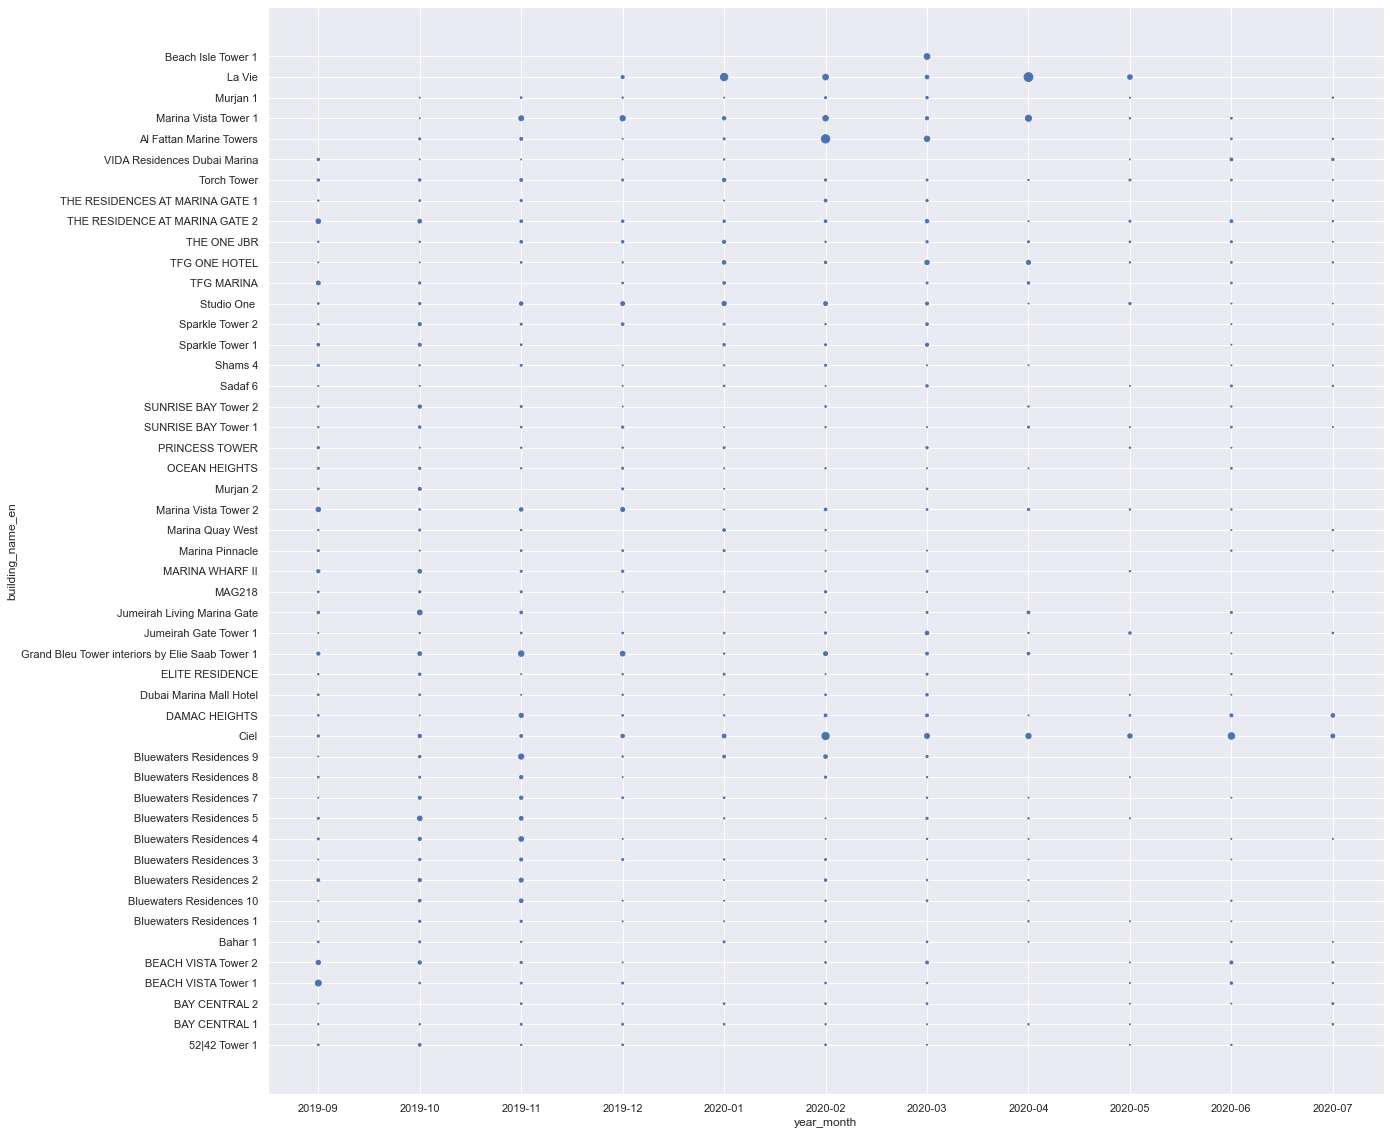

In [439]:
#scatter[plot
houses = dfgb[[('year_month',''),('building_name_en',''),('procedure_id', 'count')]]
houses.plot.scatter(x='year_month', y='building_name_en', s=houses[('procedure_id', 'count')], figsize=(20,20))

#houses.info()

C:\Users\SAMSUNG\anaconda3\envs\ML\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


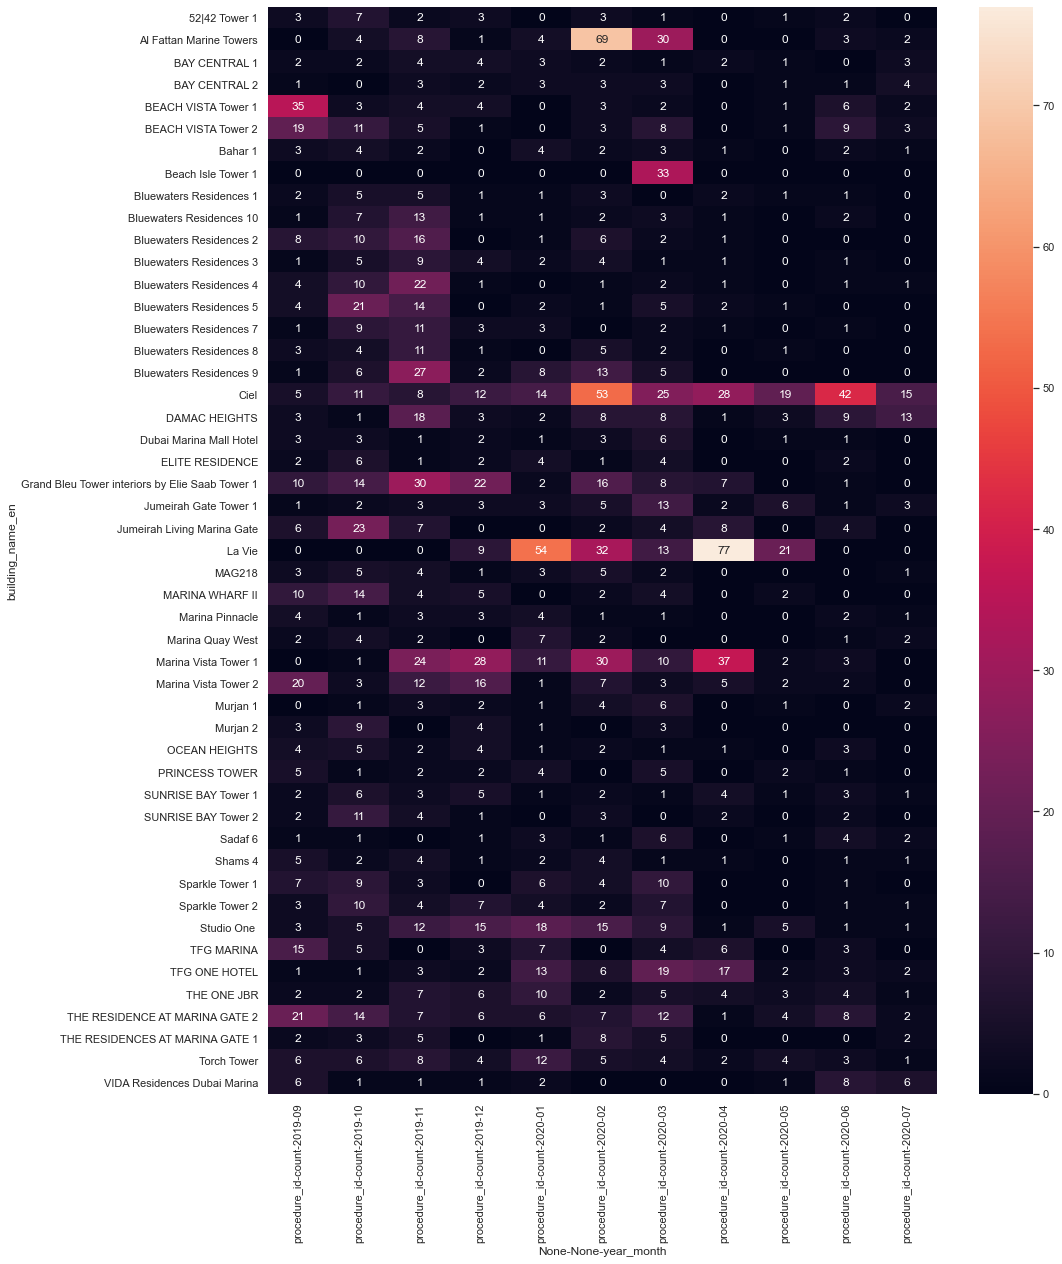

In [440]:
heatmap1_data = pd.pivot_table(houses , values=[('procedure_id', 'count')], 
                     index='building_name_en', 
                     columns='year_month',
                     fill_value=0,     #fill NaN value with zero
                     aggfunc='sum')    #default aggregation function in pivot is mean that return float so use sum
plt.figure(figsize=(15, 20))
sns.heatmap(heatmap1_data, annot=True, fmt="d" )
#heatmap1_data.info()
#heatmap1_data.head()

In [406]:
dfgb.columns

MultiIndex([(      'year_month',      ''),
            ('building_name_en',      ''),
            (    'procedure_id',  'mean'),
            (    'procedure_id', 'count'),
            (    'procedure_id',   'sum'),
            ('property_type_id',  'mean'),
            ('property_type_id', 'count'),
            ('property_type_id',   'sum'),
            (  'procedure_area',  'mean'),
            (  'procedure_area', 'count'),
            (  'procedure_area',   'sum'),
            (    'actual_worth',  'mean'),
            (    'actual_worth', 'count'),
            (    'actual_worth',   'sum'),
            ('meter_sale_price',  'mean'),
            ('meter_sale_price', 'count'),
            ('meter_sale_price',   'sum'),
            (      'rent_value',  'mean'),
            (      'rent_value', 'count'),
            (      'rent_value',   'sum'),
            ('meter_rent_price',  'mean'),
            ('meter_rent_price', 'count'),
            ('meter_rent_price',   'sum'),
           

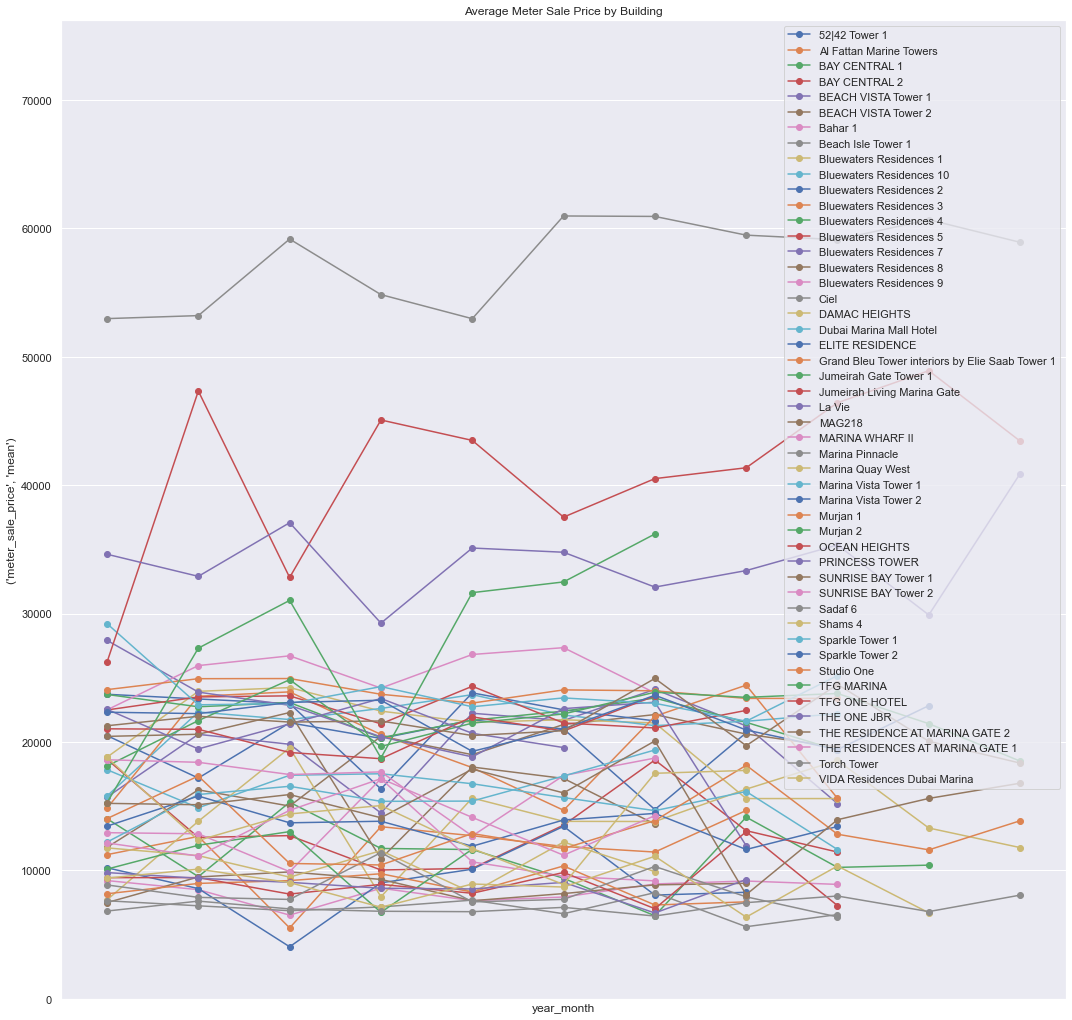

In [441]:
plot_gb_time_series(dfgb, ('year_month'), ('building_name_en'),  ('meter_sale_price',  'mean'),
                    figsize=(18,18), title="Average Meter Sale Price by Building")

In [ ]:
#dffilter.quantile([0.05,0.25,0.5,0.75,1])

THE RESIDENCE AT MARINA GATE 2     627
DAMAC HEIGHTS                      610
THE RESIDENCES AT MARINA GATE 1    556
Marina Pinnacle                    550
CAYAN TOWER                        474
                                  ... 
RIMAL WALK                           4
PARK ISLAND VILLAS 2                 3
DUBAI MARINA TOWERS - RETAIL         2
Dubai Marina Quays Villas1           1
Dubai Marina Quays Villas2           1
Name: building_name_en, Length: 196, dtype: int64

In [ ]:
#Eliminating the rows of df where df.actual_worth is above 95 percentile:


dffilter = dffilter[dffilter.actual_worth < dffilter.actual_worth.quantile(.95)]
dffilter.plot.scatter(x='instance_date',y='actual_worth',figsize=(18,9))

In [ ]:
#dffilter.plot(kind='scatter',c ='meter_sale_price', x='instance_date',y='actual_worth', figsize=(18,9))
dffilter.plot(kind='scatter', x='instance_date',c='procedure_area', y='meter_sale_price', alpha=0.8, figsize=(18,9))



In [ ]:
dffilter.plot(kind="scatter", x="instance_date", y="meter_sale_price", alpha=0.4,
    c="meter_sale_price", s=dffilter["procedure_area"], label="population", figsize=(18,9)
    , cmap=plt.get_cmap("jet"), colorbar=True)


In [ ]:
StartDt = '2019-01-01'
EndDt = '2020-12-31'

dffilter_month = dffilter.loc[(dffilter[('instance_date')] >= StartDt) & (dffilter[('instance_date')] <= EndDt)]

dffilter_month.head()

plot_gb_time_series(dffilter_month, ('instance_date'), ('building_name_en'), ('meter_sale_price'),
                    figsize=(18, 9), title="Average Meter Sale Price by Building")